In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import feature_selection as fs
from sklearn.externals import joblib as jb

ImportError: ignored

In [ ]:
df=pd.read_csv("/content/credit_score.csv")

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [ ]:
#Displaying Data Statistics
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [ ]:
df['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

In [ ]:
print(df.shape)

(100000, 28)


In [ ]:
df.isnull().any(axis=1).sum()

0

In [ ]:
df.skew()

<ipython-input-9-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


ID                          0.000000
Customer_ID                 0.011057
Month                       0.000000
Age                         0.156338
SSN                        -0.000153
Annual_Income               1.130223
Monthly_Inhand_Salary       1.128690
Num_Bank_Accounts          -0.190015
Num_Credit_Card             0.225808
Interest_Rate               0.496232
Num_of_Loan                 0.445609
Delay_from_due_date         0.969840
Num_of_Delayed_Payment     -0.214470
Changed_Credit_Limit        0.708342
Num_Credit_Inquiries        0.406825
Outstanding_Debt            1.207536
Credit_Utilization_Ratio    0.028617
Credit_History_Age         -0.048832
Total_EMI_per_month         4.041492
Amount_invested_monthly     1.761036
Monthly_Balance             1.355614
dtype: float64

In [ ]:
df.kurt()

<ipython-input-10-8bd0d54cd88d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


ID                          -1.200000
Customer_ID                 -1.187935
Month                       -1.238097
Age                         -0.926811
SSN                         -1.218547
Annual_Income                0.608152
Monthly_Inhand_Salary        0.617361
Num_Bank_Accounts           -0.691922
Num_Credit_Card             -0.327834
Interest_Rate               -0.681877
Num_of_Loan                 -0.614525
Delay_from_due_date          0.324643
Num_of_Delayed_Payment      -0.703200
Changed_Credit_Limit        -0.006529
Num_Credit_Inquiries        -0.613939
Outstanding_Debt             0.904984
Credit_Utilization_Ratio    -0.944023
Credit_History_Age          -0.902174
Total_EMI_per_month         29.783148
Amount_invested_monthly      5.025267
Monthly_Balance              1.888298
dtype: float64

# hypthesis number(1)
 While the number of Loan increase, the degree of the Credit Score decrease.
 
# hypthesis number(2)
 When the History age increase, the degree of the Credit Score increase.
 
# hypthesis number(3)
  While the payment behaviour is Low-Spent, the ratio of the (Good) Credit Score will be the highest.
  
# hypthesis number(4)
  The increasement of the Annual Income results in the ratio of the (Good) Credit Score increasment.
# hypothesis number (5) :​

The increasement of Outstanding Debt results in the ratio of the Credit Score decrease.​

# hypothesis number (6) :​

While the value of Amount invested monthly increase, the degree of the Credit Score increased.

In [ ]:
#Droping Unneaded Columns 
df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan'],axis=1,inplace=True)

In [ ]:
print(df.shape)

(100000, 23)


In [ ]:
df["Occupation"].value_counts()


Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [ ]:
df.dtypes

Month                         int64
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [ ]:
Q1 = df.Annual_Income.quantile(0.25)
Q3 = df.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df = df.drop(df.loc[df['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df = df.drop(df.loc[df['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df.corr()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Month,1.000000e+00,0.017001,-6.945370e-18,-0.001902,0.000073,0.000082,1.839158e-17,1.799851e-16,0.000284,0.000256,-0.000736,0.139447,3.764347e-17,0.002117,0.022781,0.048957,-9.164373e-17,-0.002264
Age,1.700093e-02,1.000000,8.784854e-02,0.086891,-0.189444,-0.147461,-2.170002e-01,-2.139898e-01,-0.173025,-0.183732,-0.156430,-0.253067,-2.033229e-01,0.023906,0.235900,-0.055559,6.396948e-02,0.117137
Annual_Income,-6.945370e-18,0.087849,1.000000e+00,0.997810,-0.248910,-0.203469,-2.761164e-01,-2.411628e-01,-0.223826,-0.241674,-0.151871,-0.261001,-2.581352e-01,0.152315,0.254329,0.438978,7.878816e-01,0.639533
Monthly_Inhand_Salary,-1.902071e-03,0.086891,9.978100e-01,1.000000,-0.247924,-0.202393,-2.756345e-01,-2.397760e-01,-0.223156,-0.240710,-0.151636,-0.260461,-2.579114e-01,0.152461,0.253435,0.422081,7.890738e-01,0.641017
Num_Bank_Accounts,7.334254e-05,-0.189444,-2.489096e-01,-0.247924,1.000000,0.441572,5.799945e-01,4.693950e-01,0.556391,0.596392,0.325971,0.515015,5.047347e-01,-0.060134,-0.481400,0.075440,-1.916642e-01,-0.277321
Num_Credit_Card,8.187942e-05,-0.147461,-2.034693e-01,-0.202393,0.441572,1.000000,4.969760e-01,4.169016e-01,0.478260,0.422519,0.252502,0.459193,4.903549e-01,-0.048218,-0.416850,0.073411,-1.598084e-01,-0.229670
Interest_Rate,1.839158e-17,-0.217000,-2.761164e-01,-0.275635,0.579994,0.496976,1.000000e+00,5.567176e-01,0.585016,0.565379,0.364253,0.630016,6.275208e-01,-0.064791,-0.573851,0.094981,-2.180678e-01,-0.313180
Num_of_Loan,1.799851e-16,-0.213990,-2.411628e-01,-0.239776,0.469395,0.416902,5.567176e-01,1.000000e+00,0.498687,0.469907,0.371713,0.564136,6.390207e-01,-0.091501,-0.606166,0.347407,-1.990400e-01,-0.438471
Delay_from_due_date,2.836867e-04,-0.173025,-2.238256e-01,-0.223156,0.556391,0.478260,5.850158e-01,4.986875e-01,1.000000,0.535860,0.289964,0.536702,5.696482e-01,-0.054129,-0.487875,0.099603,-1.768110e-01,-0.266084
Num_of_Delayed_Payment,2.562675e-04,-0.183732,-2.416739e-01,-0.240710,0.596392,0.422519,5.653789e-01,4.699069e-01,0.535860,1.000000,0.321242,0.494851,5.007605e-01,-0.059847,-0.476535,0.079529,-1.861225e-01,-0.273602


In [ ]:
occupation_count = df['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           6960
Engineer         6720
Architect        6672
Mechanic         6648
Scientist        6624
Media_Manager    6600
Developer        6592
Accountant       6576
Teacher          6544
Entrepreneur     6496
Doctor           6456
Journalist       6392
Manager          6288
Musician         6216
Writer           6216
Name: Occupation, dtype: int64

In [ ]:
#pip install statsmodels

In [ ]:
# dont foreget to install pingouin library everytime
#import statsmodels.api as sm

# import pingouin as pg
# from statsmodels.formula.api import ols

In [ ]:
# aov = pg.anova(data=df, dv='Age', between='Credit_Score', detailed=True)
# print(aov)

In [ ]:
# pg.welch_anova(dv='Credit_History_Age', between='Credit_Score', data=df)
# # derive the groups (i.e. sector Credit_Score)
# groups = pd.unique(df.Credit_Score.values)
# # Create a dictionary to hold respective salary of sector rank groups
# statData = {grp: df['Credit_History_Age'][df['Credit_Score'] == grp] for grp in groups}
# f_oneway(statData['Good'], statData['Standard'], statData['Poor'])

In [ ]:
# model=ols('Age ~ Credit_Score',data=df).fit()
# a=sm.stats.anova_lm(model,typ=3)
# print(a)

In [ ]:
# cpt = pg.pairwise_tukey(dv='Age', between='Credit_Score', effsize='cohen', data=df)
# print(cpt)

<AxesSubplot:title={'center':'Annual_Income'}, xlabel='Credit_Score'>

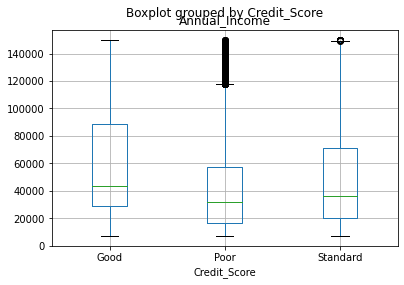

In [ ]:
df.boxplot('Annual_Income',by='Credit_Score')

<AxesSubplot:title={'center':'Num_of_Loan'}, xlabel='Credit_Score'>

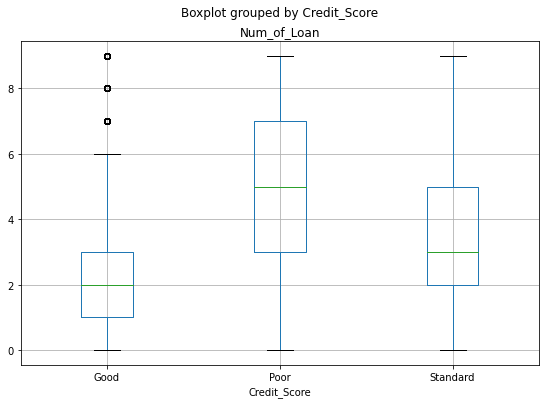

In [ ]:
df.boxplot('Num_of_Loan',by='Credit_Score',figsize=(9,6))

<AxesSubplot:title={'center':'Amount_invested_monthly'}, xlabel='Credit_Score'>

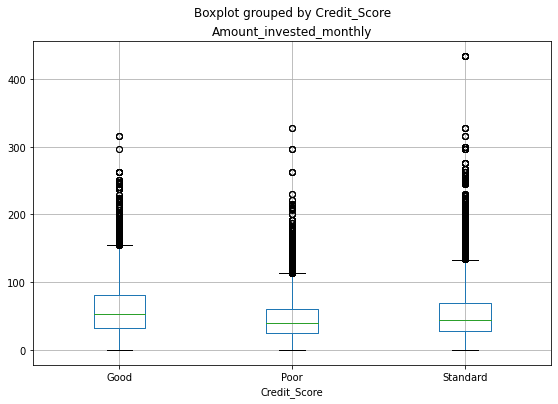

In [ ]:
df.boxplot('Amount_invested_monthly',by='Credit_Score',figsize=(9,6))

In [ ]:
from scipy.stats import f_oneway

# Running the one-way anova test between Monthly_Inhand_Salary and Credit_Scores
# Assumption(H0) is that Credit_Score and CarPrices are NOT correlated

# Finds out the Prices data for each Credit_Score as a list
CategoryGroupLists=df.groupby('Credit_Score')['Monthly_Inhand_Salary'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


<AxesSubplot:xlabel='Credit_Score', ylabel='Age'>

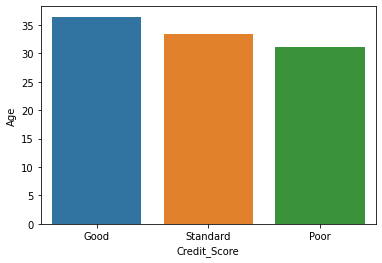

In [ ]:
sns.barplot(x=df.Credit_Score, y=df.Age, data=df, ci=None) 

In [ ]:
df.Credit_Score.value_counts().unique

<bound method Series.unique of Standard    52399
Poor        28678
Good        16923
Name: Credit_Score, dtype: int64>

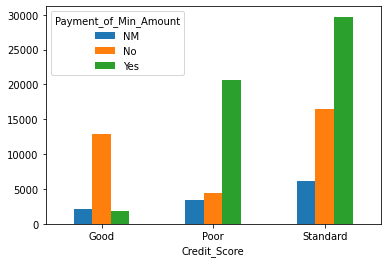

In [ ]:
crosstb = pd.crosstab(df.Credit_Score, [df.Payment_of_Min_Amount])
barplot = crosstb.plot.bar(rot=0)
#df.Payment_of_Min_Amount, df.Credit_Mix

In [ ]:
# crosstb = pd.crosstab(df.Credit_Score, [df.Amount_invested_monthly])
# barplot = crosstb.plot.bar(rot=0)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


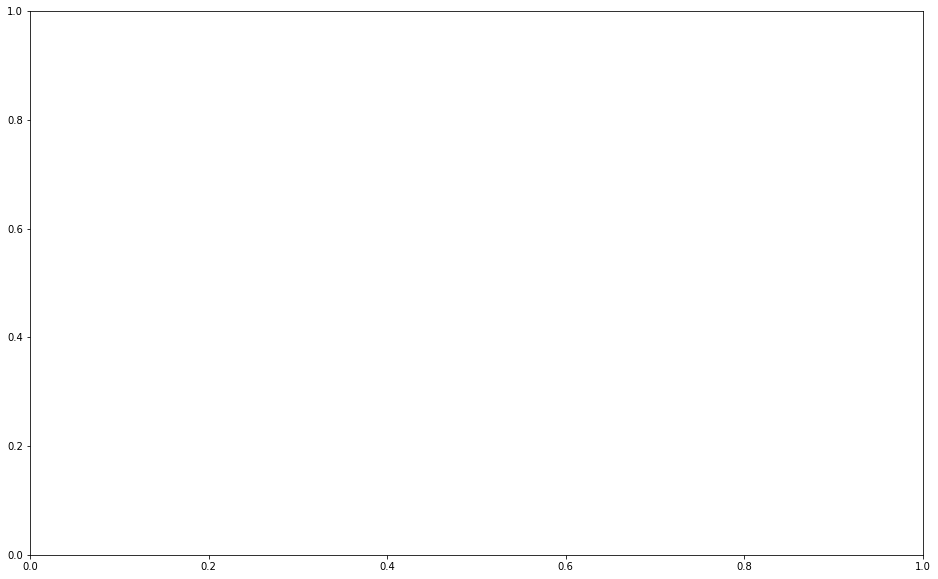

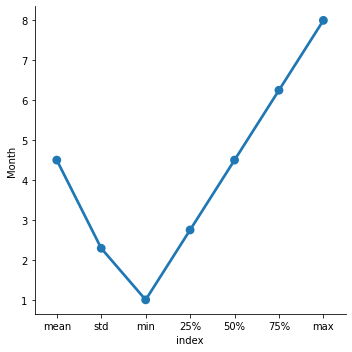

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


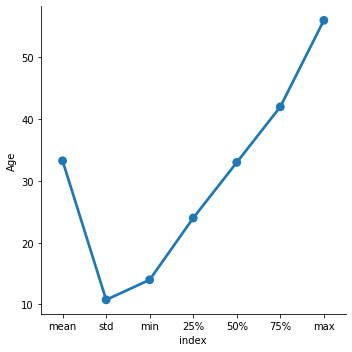

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


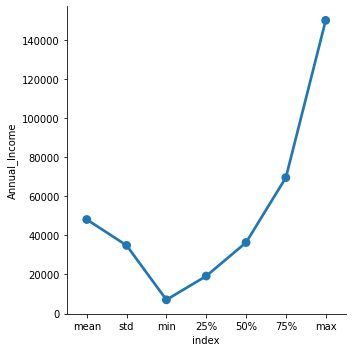

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


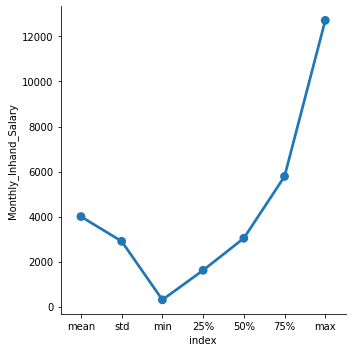

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


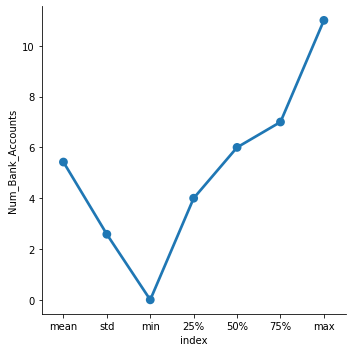

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


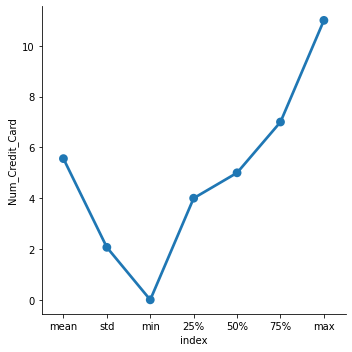

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


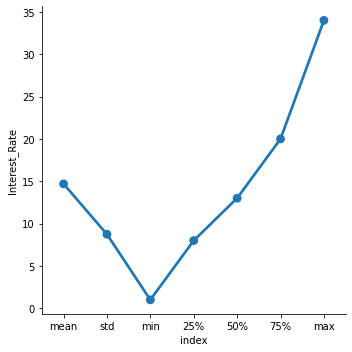

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


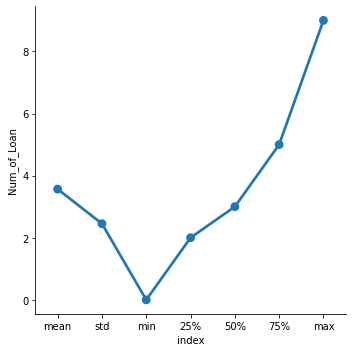

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


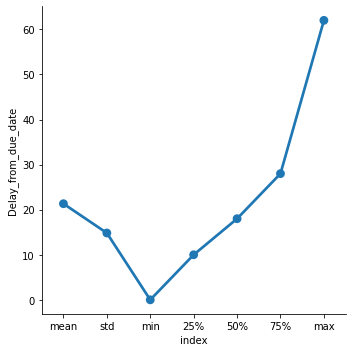

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


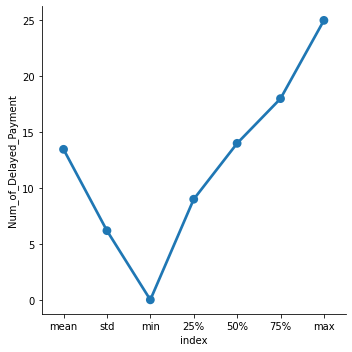

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


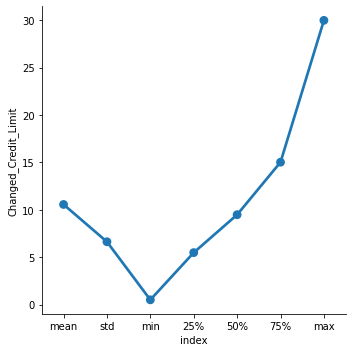

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


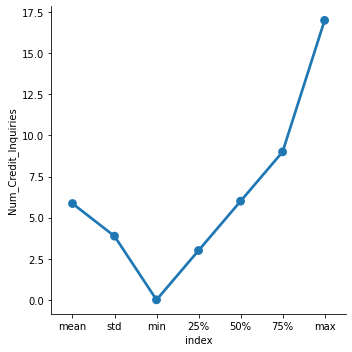

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


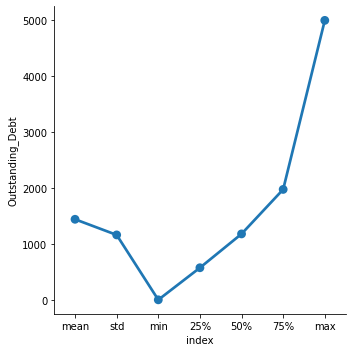

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


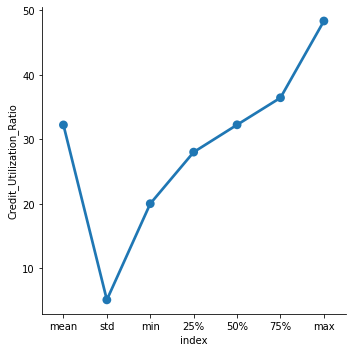

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


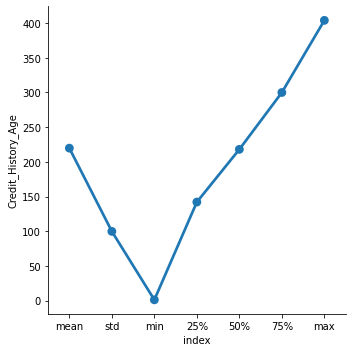

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


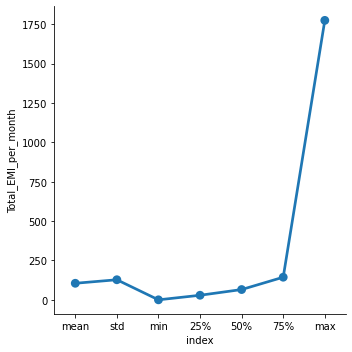

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


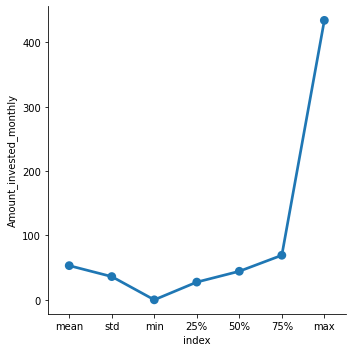

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


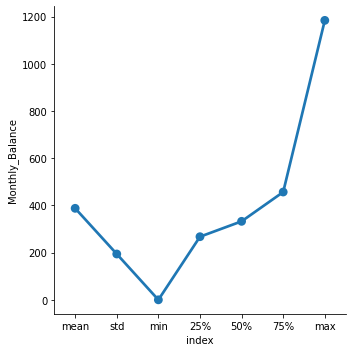

In [ ]:
total_columns = df.columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = df._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))
describe_num_df = df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
fig,ax=plt.subplots(figsize=(16,10))
mq=0
for i in num_col:
  if i in ['index']:
    continue
  mq=+1  
  sns.factorplot(x='index', y=i, data=describe_num_df)
  plt.show()

#list_col=['Annual_Income','Interest_Rate','Changed_Credit_Limit','Outstanding_Debt','Credit_History_Age','Monthly_Balance']
#fig,ax=plt.subplots(figsize=(16,10))
#for i,j in enumerate(list_col):
#    plt.subplot(2,3,i+1)
#    sns.factorplot(x='index', y=list_col[i], data=df.describe(include=['int64','float64'])) 
#    sns.boxplot(x=data['Credit_Score'], y=data[j])
#plt.show()

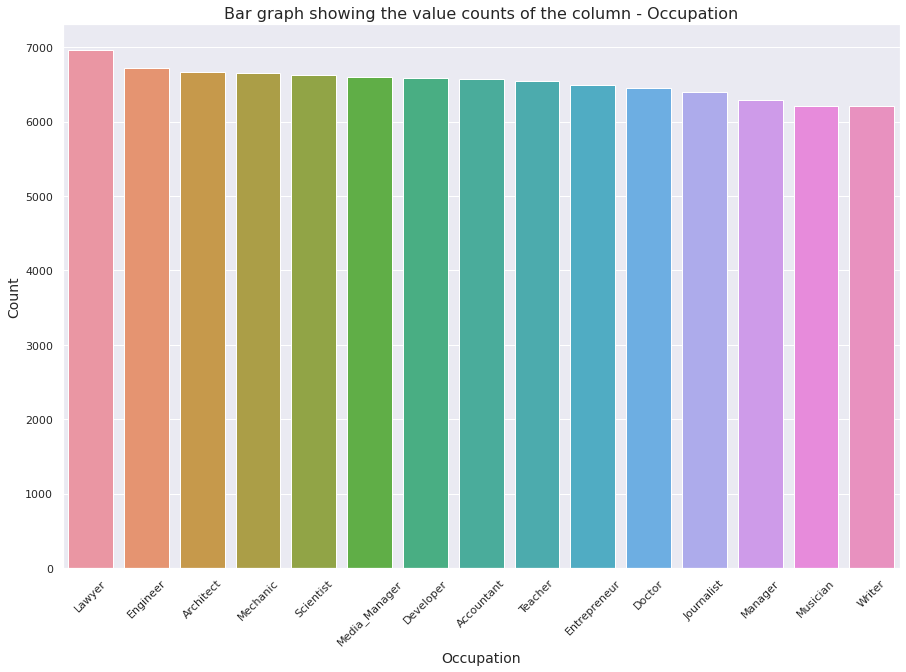

In [ ]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


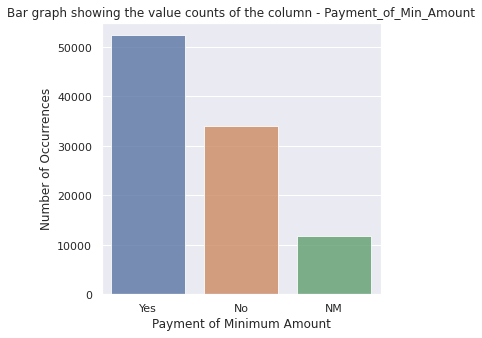

In [ ]:
### Bar graph showing the value counts of the column - Payment_of_Min_Amount
min_amount_count = df['Payment_of_Min_Amount'].value_counts(dropna = False)
sns.set(rc = {'figure.figsize': (5, 5)})
sns.barplot(min_amount_count.index, min_amount_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - Payment_of_Min_Amount')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Payment of Minimum Amount', fontsize = 12)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

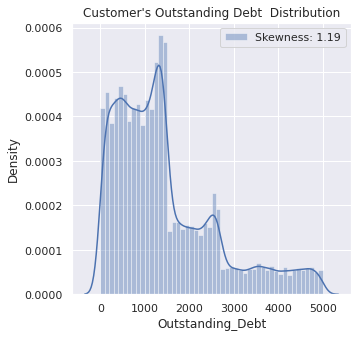

In [ ]:
sns.distplot(df['Outstanding_Debt'], label = 'Skewness: %.2f'%(df['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Age Distribution')

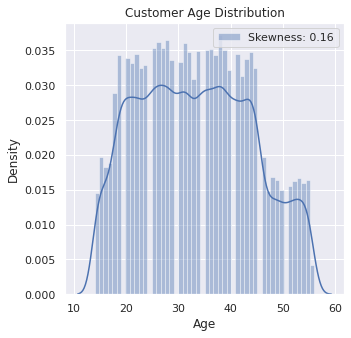

In [ ]:
sns.distplot(df['Age'], label = 'Skewness: %.2f'%(df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Monthly inhand salary')

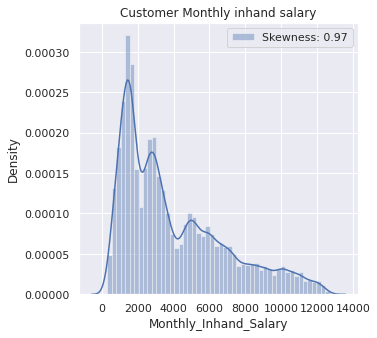

In [ ]:
sns.distplot(df['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly inhand salary')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Monthly Balance')

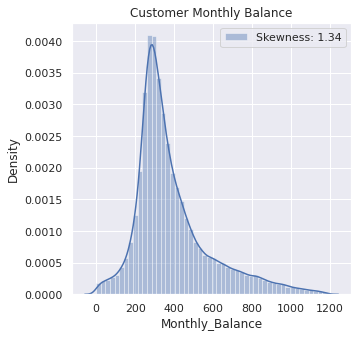

In [ ]:
sns.distplot(df['Monthly_Balance'], label = 'Skewness: %.2f'%(df['Monthly_Balance'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Balance')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Total_EMI_per_month')

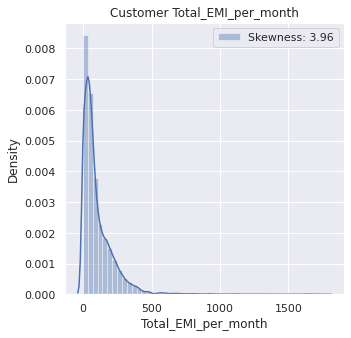

In [ ]:
sns.distplot(df['Total_EMI_per_month'], label = 'Skewness: %.2f'%(df['Total_EMI_per_month'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Total_EMI_per_month')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Amount_invested_monthly')

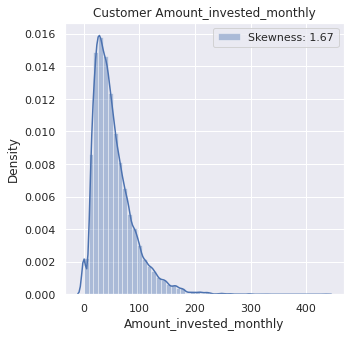

In [ ]:
sns.distplot(df['Amount_invested_monthly'], label = 'Skewness: %.2f'%(df['Amount_invested_monthly'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Amount_invested_monthly')

<AxesSubplot:xlabel='Annual_Income'>

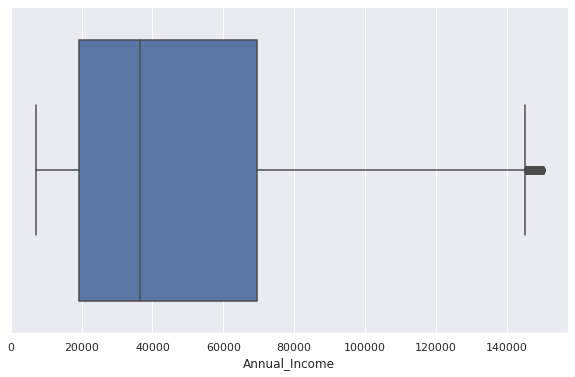

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Annual_Income'])

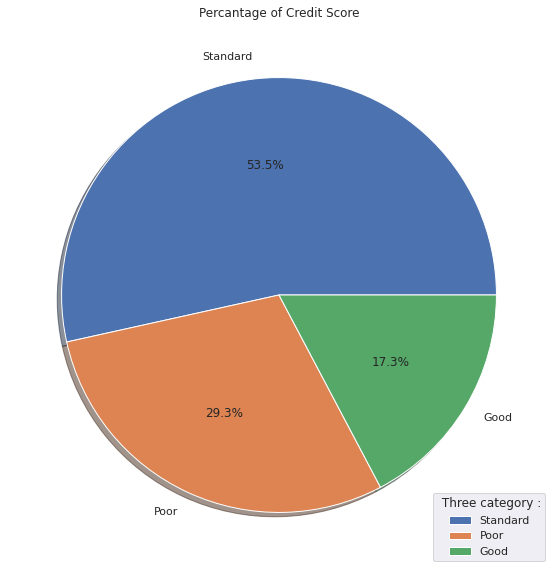

In [ ]:
label = df.Credit_Score.value_counts().index
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
label_count = df.Credit_Score.value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
ax.set_title("Percantage of Credit Score")
plt.legend(title=" Three category :")
plt.show()

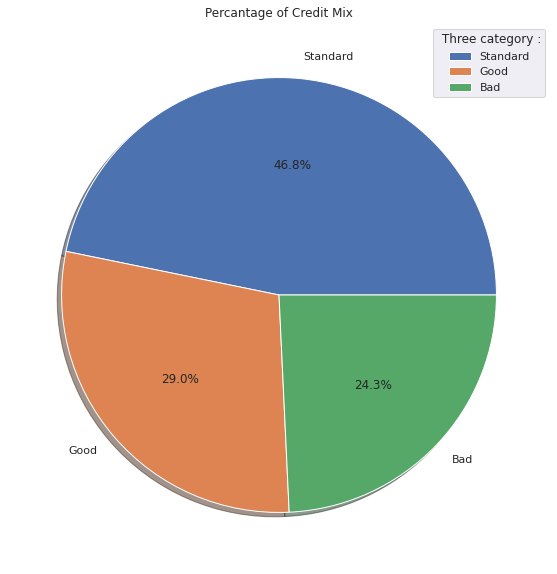

In [ ]:
label = df.Credit_Mix.value_counts().index
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
label_count = df.Credit_Mix.value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
ax.set_title("Percantage of Credit Mix")
plt.legend(title=" Three category :")
plt.show()

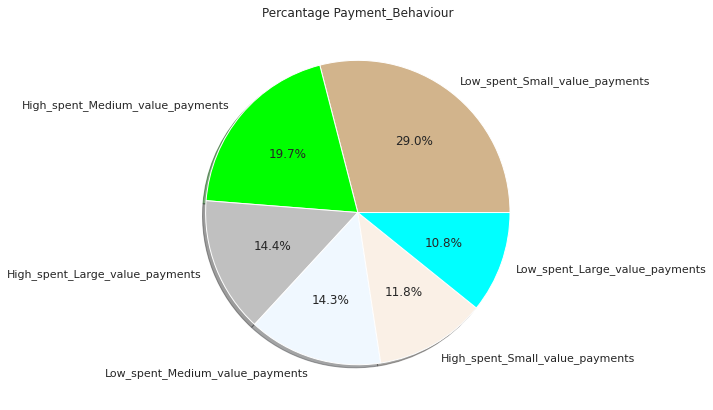

In [ ]:
label = df.Payment_Behaviour.value_counts().index
fig, ax = plt.subplots(figsize=(11, 7), subplot_kw=dict(aspect="equal"))
label_count = df.Payment_Behaviour.value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1,colors=['tan','lime','silver','aliceblue','linen','aqua'])
ax.set_title("Percantage Payment_Behaviour")
plt.show()

<AxesSubplot:xlabel='Outstanding_Debt'>

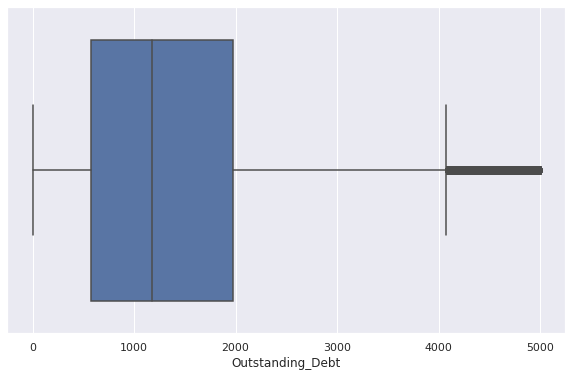

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Outstanding_Debt'])

In [ ]:
df['category_age']=pd.cut(df.Age,bins=[18,30,40,50,99],labels=["Young adult (18-30)","Middle Age(30-40)","Adult(40-50)","Elder(50-99)"])

In [ ]:
from locale import normalize
cate=df['category_age'].value_counts(normalize=True)

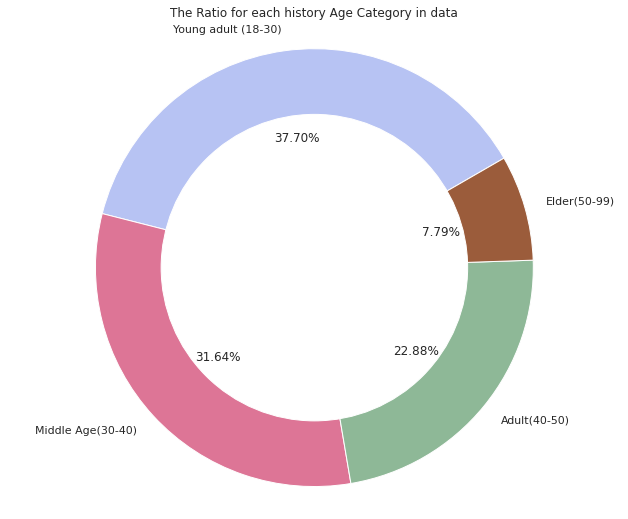

In [ ]:
labels=cate.index
sizes=cate.values
fig, ax = plt.subplots(figsize=(11,9))
ax.pie(x=sizes, labels=labels, startangle=30,autopct='%1.2f%%',colors=['#B7C3F3','#DD7596' , '#8EB897','#9b5c3b'])
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('The Ratio for each history Age Category in data')
plt.show()

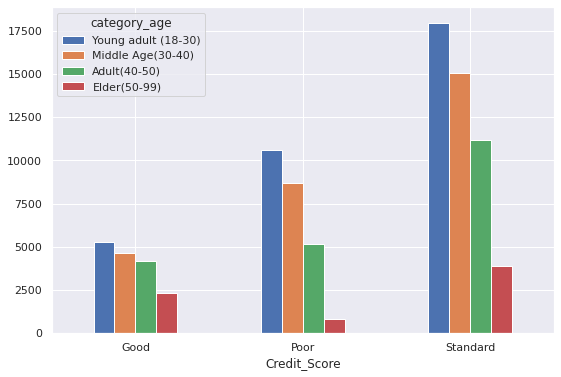

In [ ]:
crosstb = pd.crosstab(df.Credit_Score, [df.category_age])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))

In [ ]:
df.shape

(98000, 24)

In [ ]:
df.drop('category_age', axis=1,inplace=True)


In [ ]:
df.shape

(98000, 23)

In [ ]:
# crosstb = pd.crosstab(df.Credit_Score, an)
# barplot = crosstb.plot.bar(rot=0)

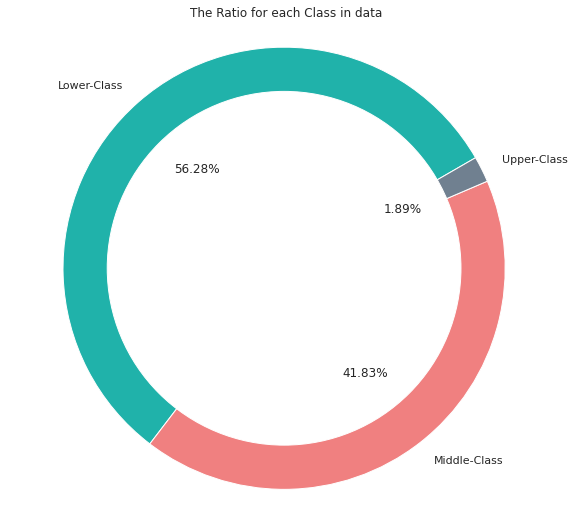

In [ ]:
x = ['Lower-Class', 'Middle-Class', 'Upper-Class']
y = [20000,60000,140000, 180000]
df['Annual_cat']=pd.cut(df.Annual_Income, bins=y, labels=x)
an=df['Annual_cat'].value_counts(normalize=True)
x=an.values
y=an.index
fig, ax = plt.subplots(figsize=(10,9))
ax.pie(x=x,labels=y, startangle=30,autopct='%1.2f%%',colors=['lightseagreen','lightcoral','slategrey'])
ax.axis('equal')
centre_circle = plt.Circle((0, 0), 0.80, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('The Ratio for each Class in data')
plt.show()


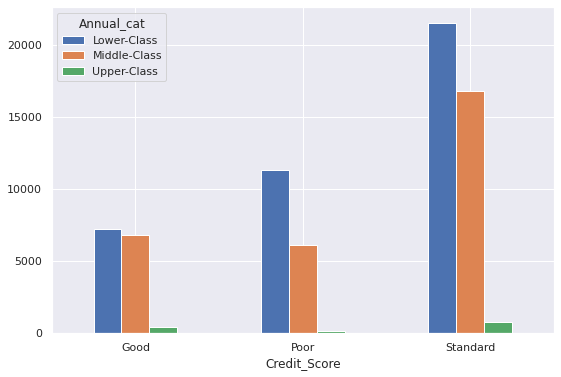

In [ ]:
crosstb = pd.crosstab(df.Credit_Score, [df.Annual_cat])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))

 **correlation between each pair of variable**

In [ ]:
df.drop('Annual_cat', axis=1,inplace=True)

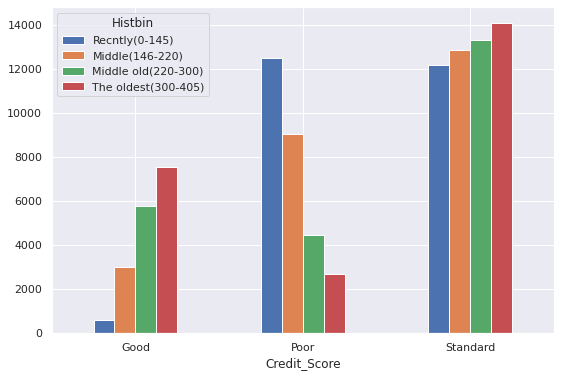

In [ ]:
df['Histbin']=pd.cut(df.Credit_History_Age,bins=[1,145,220,300,405],labels=["Recntly(0-145)","Middle(146-220)","Middle old(220-300)","The oldest(300-405)",])
crosstb = pd.crosstab(df.Credit_Score, [df.Histbin])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))
df.drop('Histbin', axis=1,inplace=True)

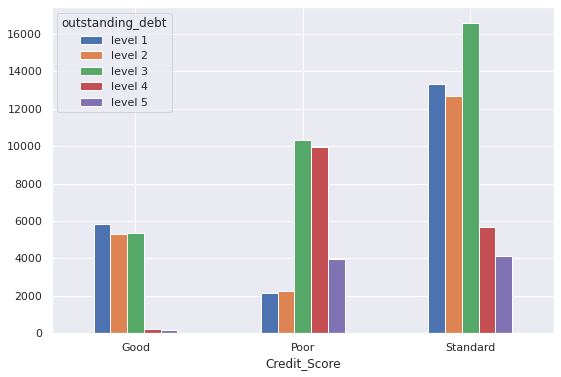

In [ ]:
df['outstanding_debt']=pd.cut(df.Outstanding_Debt,bins=[0,500,1000,2000,3500,5000],labels=["level 1","level 2","level 3","level 4","level 5"])
crosstb = pd.crosstab(df.Credit_Score, [df.outstanding_debt])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))
df.drop('outstanding_debt', axis=1,inplace=True)

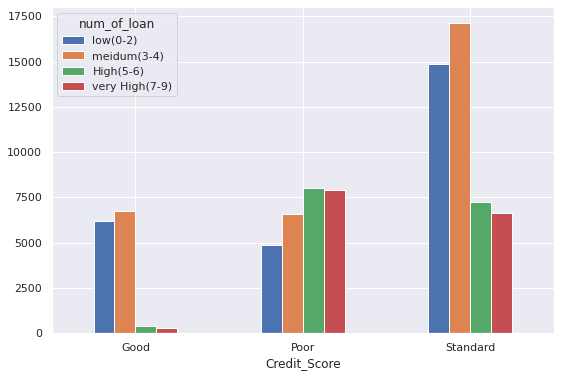

In [ ]:
df['num_of_loan']=pd.cut(df.Num_of_Loan,bins=[0,2,4,6,9],labels=["low(0-2)","meidum(3-4)","High(5-6)","very High(7-9)",])
crosstb = pd.crosstab(df.Credit_Score, [df.num_of_loan])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))
df.drop('num_of_loan', axis=1,inplace=True)

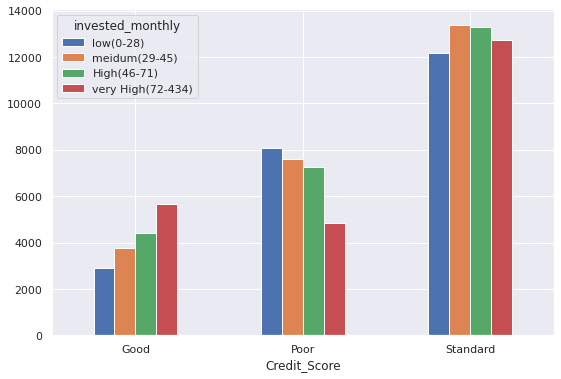

In [ ]:
df['invested_monthly']=pd.cut(df.Amount_invested_monthly,bins=[0,28,45,71,434],labels=["low(0-28)","meidum(29-45)","High(46-71)","very High(72-434)"])
crosstb = pd.crosstab(df.Credit_Score, [df.invested_monthly])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))
df.drop('invested_monthly', axis=1,inplace=True)

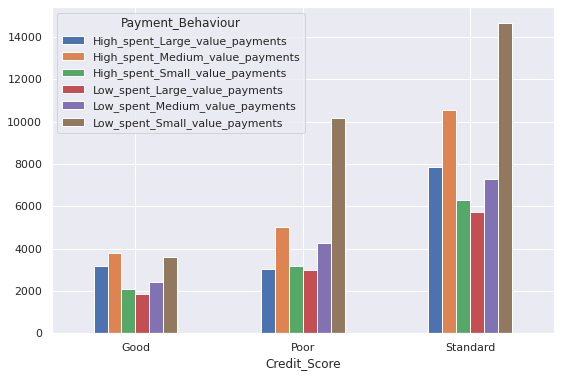

In [ ]:
crosstb = pd.crosstab(df.Credit_Score, [df.Payment_Behaviour])
barplot = crosstb.plot.bar(rot=0,figsize=(9,6))

Text(0.5, 1.0, 'correlation between each pair of variable')

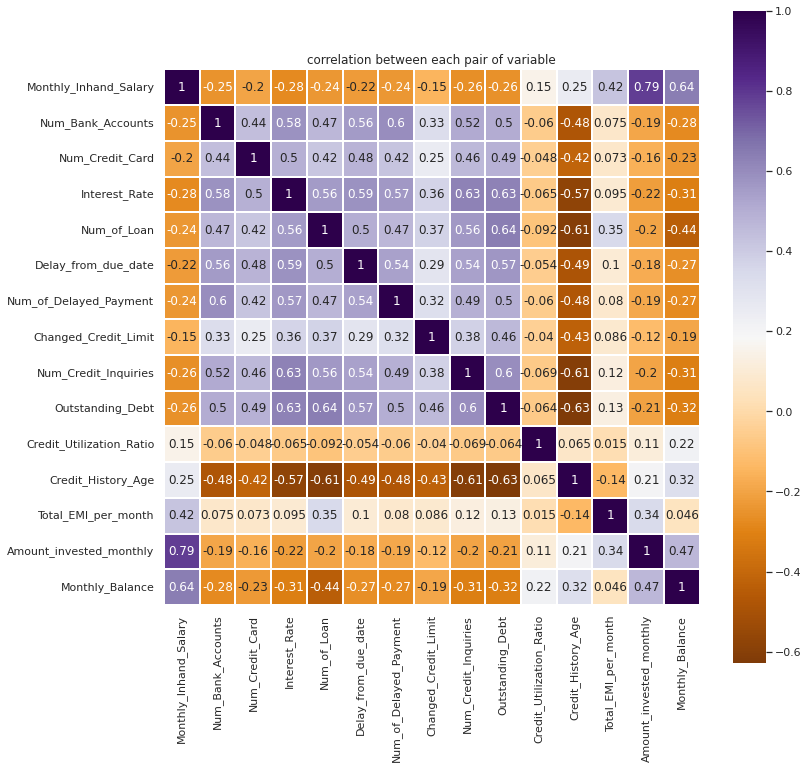

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:,4:].corr(),linewidth = 2,annot=True,fmt='.2g',cmap='PuOr',square=True)
plt.title('correlation between each pair of variable')

In [ ]:
#df = pd.get_dummies(df,prefix=[2,9,14,18,21,23]).values # one hot encoding]
#from sklearn.preprocessing import LabelEncoder
#lb=LabelEncoder()
#y=lb.fit_transform(df.iloc[:,-2].values)


In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df['Payment_Behaviour'] = df['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
df['Payment_Behaviour'] = df[['Payment_Behaviour']].apply(pd.to_numeric)
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,4,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,3,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,2,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,1,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,5,341.489231,Good


In [ ]:
df['Credit_Score'] = df['Credit_Score'].str.replace('Good', '3', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Standard', '2', n=-1)
df['Credit_Score'] = df['Credit_Score'].str.replace('Poor', '1', n=-1)
df['Credit_Score'] = df[['Credit_Score']].apply(pd.to_numeric)

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('NM', '0')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('Yes', '1')
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].str.replace('No', '2')
df['Payment_of_Min_Amount'] = df[['Payment_of_Min_Amount']].apply(pd.to_numeric)


In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('Good', '3')
df['Credit_Mix'] = df['Credit_Mix'].str.replace('Standard', '2')
df['Credit_Mix'] = df['Credit_Mix'].str.replace('Bad', '1')
df['Credit_Mix'] = df[['Credit_Mix']].apply(pd.to_numeric)

In [ ]:
df = pd.get_dummies(df, prefix='Occupation', columns=['Occupation'], drop_first=False)
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,0,0,0,1,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0,0,0,0,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,0,0,0,1,0,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,0,0,0,0,1,0,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.shape

(98000, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 99999
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     98000 non-null  int64  
 1   Age                       98000 non-null  float64
 2   Annual_Income             98000 non-null  float64
 3   Monthly_Inhand_Salary     98000 non-null  float64
 4   Num_Bank_Accounts         98000 non-null  float64
 5   Num_Credit_Card           98000 non-null  float64
 6   Interest_Rate             98000 non-null  float64
 7   Num_of_Loan               98000 non-null  float64
 8   Delay_from_due_date       98000 non-null  float64
 9   Num_of_Delayed_Payment    98000 non-null  float64
 10  Changed_Credit_Limit      98000 non-null  float64
 11  Num_Credit_Inquiries      98000 non-null  float64
 12  Credit_Mix                98000 non-null  int64  
 13  Outstanding_Debt          98000 non-null  float64
 14  Credit

In [ ]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,0,0,0,1,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,0,0,0,0,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,0,0,0,0,0,0,0,1,0,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,0,0,0,0,0,0,0,1,0,0
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df.drop('Credit_Score',axis = 1)
y = df['Credit_Score']
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2)

In [ ]:
clf = LogisticRegression()
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
accuracy_score(ytest, ypred)
print(confusion_matrix(ytest, ypred))

[[1921 3813   19]
 [1575 8728  176]
 [  88 3129  151]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(ytest,ypred))

0.5510204081632653


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, ytrain)
y_pred=knn.predict(Xtest)
print(accuracy_score(ytest,y_pred))

0.7816326530612245


In [ ]:
clf1 = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf1.fit(Xtrain, ytrain)
  
# performing predictions on the test dataset
y_pred = clf1.predict(Xtest)
print("ACCURACY OF THE MODEL: ", accuracy_score(ytest, y_pred))

ACCURACY OF THE MODEL:  0.8291836734693877


In [ ]:
fs_indices_rfi = np.argsort(clf1.feature_importances_)[::-1][0:]
best_features_rfi = df.columns[fs_indices_rfi].values
best_features_rfi


array(['Outstanding_Debt', 'Credit_Mix', 'Interest_Rate',
       'Credit_History_Age', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Monthly_Balance',
       'Credit_Utilization_Ratio', 'Num_Credit_Card',
       'Total_EMI_per_month', 'Num_Credit_Inquiries', 'Annual_Income',
       'Amount_invested_monthly', 'Monthly_Inhand_Salary', 'Month',
       'Num_of_Delayed_Payment', 'Age', 'Num_Bank_Accounts',
       'Num_of_Loan', 'Payment_Behaviour', 'Payment_of_Min_Amount',
       'Occupation_Musician', 'Occupation_Journalist',
       'Occupation_Scientist', 'Occupation_Engineer',
       'Occupation_Developer', 'Occupation_Accountant',
       'Occupation_Architect', 'Credit_Score', 'Occupation_Manager',
       'Occupation_Doctor', 'Occupation_Lawyer',
       'Occupation_Entrepreneur', 'Occupation_Mechanic',
       'Occupation_Media_Manager', 'Occupation_Teacher'], dtype=object)

In [ ]:
feature_importances_rfi = clf1.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.10849842, 0.08231525, 0.06909417, 0.063516  , 0.05654919,
       0.05322442, 0.04484915, 0.04232914, 0.04142561, 0.04002909,
       0.03861946, 0.03801117, 0.03780154, 0.03736133, 0.03622273,
       0.0359459 , 0.03398619, 0.02843127, 0.02303006, 0.02075744,
       0.0196352 , 0.00352013, 0.00339384, 0.00333992, 0.00327515,
       0.00327342, 0.0032353 , 0.00323472, 0.00320669, 0.00319251,
       0.00317393, 0.00314757, 0.00312975, 0.00312162, 0.00310326,
       0.00301945])

In [ ]:
def plot_imp(best_features, scores, method_name): 
    plt.barh(best_features, scores)
    plt.rcParams["figure.figsize"] = (25,20)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

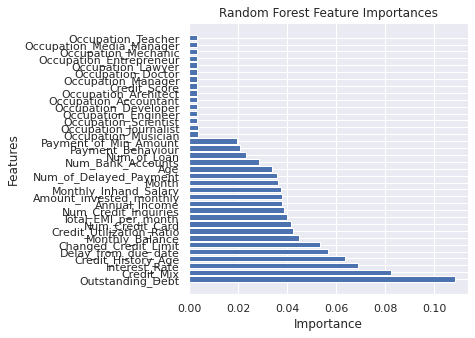

In [ ]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [ ]:
def count(x):
    lst_of_loan=[]
    for i in x.str.split(','):
        for j in i:
            if (j.strip() not in lst_of_loan) and ('and' not in j.strip()) :
                lst_of_loan.append(j.strip()) 
    return lst_of_loan
            
lst=count(df1['Type_of_Loan'])

df=df1.copy()
for i in lst :
    df[i]=False

df1['Type_of_Loan'] = df1['Type_of_Loan'].astype('str')
# dropping the 'and ' strings
df1['Type_of_Loan'] = [item.replace('and ', '') for item in df1['Type_of_Loan']]

df1['Type_of_Loan'] = [item.replace(', ', ',') for item in df1['Type_of_Loan']]
# splitting each item in the member of the feature by comma delimiter
df1['Type_of_Loan'] = [item.split(',') for item in df1['Type_of_Loan']]

for i in range(len(df1['Type_of_Loan'])):
    df1['Type_of_Loan'][i]=','.join(df1['Type_of_Loan'][i])

for i in lst:
    for j in range(len(df1['Type_of_Loan'])):        
        for k in df1['Type_of_Loan'][j].split(','): 
               if k==i :
                    df.loc[j,i]=1
               else :
                 df.loc[j,i]=0     

In [ ]:
le=LabelEncoder()
le.fit(df['Credit_Score'])
df['New_Credit_Score']=le.transform(df['Credit_Score'])
df.drop('Credit_Score',axis=1,inplace=True)
jb.dump(le,'saved encoder.sav')

le1=LabelEncoder()
le1.fit(df[['Payment_Behaviour']])
df['New_Payment_Behaviour']=le1.transform(df[['Payment_Behaviour']])
jb.dump(le1,'Payment_Behaviour.sav')

le2=LabelEncoder()
le2.fit(df[['Payment_of_Min_Amount']])
df['New_Payment_of_Min_Amount']=le2.transform(df[['Payment_of_Min_Amount']])
jb.dump(le2,'Payment_of_Min_Amount.sav')

le3=LabelEncoder()
le3.fit(df[['Credit_Mix']])
df['New_Credit_Mix']=le3.transform(df[['Credit_Mix']])
jb.dump(le3,'Credit_Mix.sav')

le4=LabelEncoder()
le4.fit(df[['Occupation']])
df['New_Occupation']=le4.transform(df[['Occupation']])
jb.dump(le4,'Occupation.sav')

In [ ]:
# ordinal_encoder=OrdinalEncoder()
# ordinal_encoder_beha=OrdinalEncoder()
# ordinal_encoder_beha.fit(df[['Payment_Behaviour']])
# jb.dump(ordinal_encoder_beha,'test 2.sav')
# df['New_Payment_Behaviour']=ordinal_encoder_beha.transform(df[['Payment_Behaviour']])
# df['New_Payment_Behaviour']=ordinal_encoder.transform(df[['Payment_Behaviour']])
# # df['New_Payment_Behaviour']=ordinal_encoder.fit_transform(df[['Payment_Behaviour']])
# df['New_Payment_of_Min_Amount']=ordinal_encoder.fit_transform(df[['Payment_of_Min_Amount']])
# df['New_Credit_Mix']=ordinal_encoder.fit_transform(df[['Credit_Mix']])
# jb.dump(ordinal_encoder,'ordinal encoder.sav')
# df.drop(columns=['Payment_Behaviour','Payment_of_Min_Amount','Credit_Mix','Occupation'],axis=1,inplace=True)

In [ ]:
# encoder = OneHotEncoder()
# #perform one-hot encoding on 'Occupation' columns
# occupation_df = pd.DataFrame(encoder.fit_transform(df[['Occupation']]).toarray())
# final_df = df.join(occupation_df)
# df.drop('Occupation', axis=1, inplace=True)
# jb.dump(encoder,'occupation encoder.sav')

In [ ]:
# payment_pehaviour=jb.load('/content/Payment_Behaviour.sav')
# X['New_Payment_Behaviour']=payment_pehaviour.transform(X[['New_Payment_Behaviour']])
# payment_oma=jb.load('/content/Payment_of_Min_Amount.sav')
# X['New_Payment_of_Min_Amount']=payment_oma.transform(X[['New_Payment_of_Min_Amount']])
# credit_mix=jb.load('/content/Credit_Mix.sav')
# X['New_Credit_Mix']=credit_mix.transform(X[['New_Credit_Mix']])
# occupation=jb.load('/content/Occupation.sav')
# X['New_Occupation']=occupation.transform(X[['New_Occupation']])
# scaler=jb.load('/content/standard scaler.sav')
# X=scaler.transform(X)